In [1]:
import pyfolio_fork_aprm as pf

In [2]:
import utils

In [3]:
import empyrical as ep
import scipy

In [83]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
returns_df = utils.get_returns_df()

In [11]:
rf = utils.get_risk_free_returns_series(returns_df)

In [59]:
ff = ep.utils.load_portfolio_risk_factors(start=returns_df.index[0], end=returns_df.index[-1])

In [50]:
# All measures are calculated using daily returns data, and are not annualised unless explicitly stated

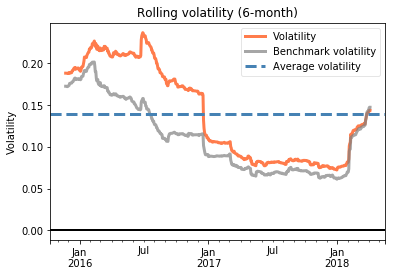

In [267]:
pf.plot_rolling_volatility(returns_df['JFUAX'], returns_df['BSPIX'])

In [7]:
# check equal to downside risk from empyrical
print(np.sqrt(utils.lpm(returns, target_rate=0, order=2)) * np.sqrt(252))
downside_risk_annualised = ep.downside_risk(returns)
downside_risk_annualised

0.11028980397350972


0.11028980397350972

In [260]:
from importlib import reload
reload(utils)
import utils

In [261]:
utils.main()

In [203]:
x = utils.get_full_perf_stats_df(returns_df.dropna(), utils.get_funds_list(), 
                                 utils.get_risk_free_returns_series(returns_df.dropna()), numeric=True)

In [204]:
x

Active                          \
                                               JFUAX       JLCAX       JDEAX   
Annual return                                   4.1%        6.7%        6.1%   
Cumulative returns                             12.5%       20.9%       19.0%   
Volatility (annualised)                        15.5%       14.8%       13.7%   
Sharpe ratio (annualised)                   0.336443    0.509836    0.498004   
Stability                                    0.66004    0.798713    0.787487   
Drawdown                                    0.103982    0.116771    0.115225   
Omega ratio (annualised)                       1.065     1.10197     1.10093   
Sortino ratio (annualised)                  0.455817    0.697743    0.682559   
Skew                                       -0.800905   -0.702782   -0.659917   
Kurtosis                                     4.72409      4.2394     4.15374   
Tail ratio                                  0.907464    0.947727    0.945011   
Value at risk                                  -1.9%       -1.8%       -1.7%   
Alpha (annualised)                        -0.0386867  -0.0320301  -0.0326847   
Beta                                         1.23556     1.12053     1.05291   
Burke ratio (annualised)                    0.661159    0.942313    0.894034   
Expected shortfall                         0.0065211  0.00589654  0.00542293   
Information ratio (annualised)             -0.303974   -0.604822    -1.54337   
Kappa 1                                   -0.0650026   -0.101971   -0.100935   
Kappa 3                                   -0.0186396  -0.0285772      -0.028   
Return on prob. of shortfall (annualised)    0.10682    0.151522    0.137935   
Return on value at risk                    0.0117812   0.0190456   0.0184729   
Shortfall risk                              0.487871    0.498652    0.495957   
Sterling ratio (annualised)                 0.719893     1.03345    0.999594   
Treynor ratio (annualised)                 0.0421786   0.0674293   0.0649719   
root(lpm(0,2)) (annualised)                 0.114332    0.108287    0.100225   

                                                                   \
                                                OEIAX       JFTAX   
Annual return                                    3.7%        3.4%   
Cumulative returns                              11.2%       10.4%   
Volatility (annualised)                         14.6%       14.4%   
Sharpe ratio (annualised)                    0.319492    0.304541   
Stability                                    0.599041    0.561595   
Drawdown                                     0.114443    0.112572   
Omega ratio (annualised)                      1.06275     1.05932   
Sortino ratio (annualised)                   0.424591    0.401349   
Skew                                         -1.64646    -1.72655   
Kurtosis                                      15.3258      15.548   
Tail ratio                                   0.916941    0.892874   
Value at risk                                   -1.8%       -1.8%   
Alpha (annualised)                         0.00371471  0.00152506   
Beta                                         0.834818    0.824349   
Burke ratio (annualised)                      0.58031    0.559593   
Expected shortfall                         0.00584396  0.00593164   
Information ratio (annualised)             -0.0499797  -0.0790386   
Kappa 1                                      -0.06275  -0.0593175   
Kappa 3                                    -0.0155736  -0.0147506   
Return on prob. of shortfall (annualised)   0.0924105   0.0886662   
Return on value at risk                     0.0120567   0.0116104   
Shortfall risk                               0.505391    0.495957   
Sterling ratio (annualised)                  0.645439    0.625793   
Treynor ratio (annualised)                  0.0559444   0.0533447   
root(lpm(0,2)) (annualised)                  0.109996    0.109567   

                     

C:\Users\Kevin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


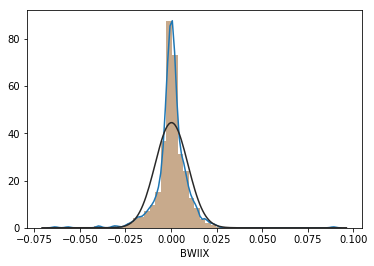

In [256]:
sns.distplot(returns_df['BWIIX'].pipe(np.log1p))
sns.distplot(returns_df['BWIIX'].pipe(np.log1p), kde=False, fit=scipy.stats.norm)

In [10]:
print(returns.mean() * 252 / downside_risk_annualised)
ep.sortino_ratio(returns)

0.21463775137041413


0.21463775137041413

In [11]:
historical_5pct_VaR = returns.quantile(0.05)
# this matches with empyrical but not with pyfolio, which returns a theoretical VaR by assuming a normal distribution

In [13]:
print((returns.mean() / returns.std()) * np.sqrt(252))
ep.sharpe_ratio(returns)

0.15012520798693332


0.15012520798693332